In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/survey lung cancer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
#Find Object
object_cols = df.select_dtypes(include='object')
print(object_cols)

    GENDER LUNG_CANCER
0        M         YES
1        M         YES
2        F          NO
3        M          NO
4        F          NO
..     ...         ...
304      F         YES
305      M         YES
306      M         YES
307      M         YES
308      M         YES

[309 rows x 2 columns]


In [5]:
from sklearn.preprocessing import LabelEncoder
col=['GENDER','LUNG_CANCER']
le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])

In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nColumns with infinite values:")
print((df == float('inf')).sum())


Missing values per column:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Columns with infinite values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [7]:
#Split features and terget
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [8]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Decision Tree

In [11]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [12]:
#Evaluation with Full Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf .predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9194
Precision: 0.9804
Recall: 0.9259
F1 Score: 0.9524
ROC AUC Score: 0.9005
Balanced Accuracy: 0.9005
Matthews Corr Coef: 0.7028


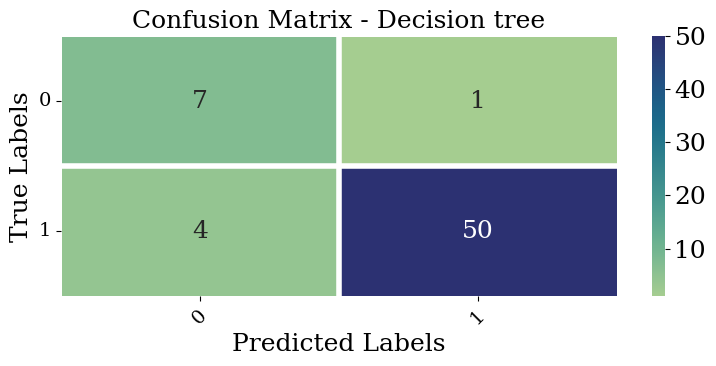

In [13]:
#Confusion Matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Decision tree"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

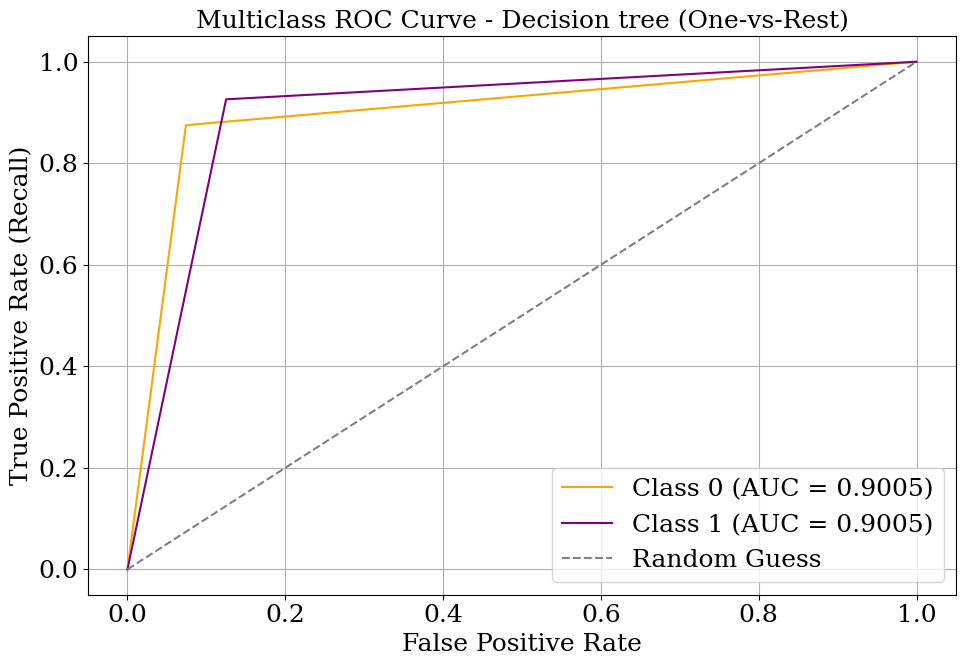

In [14]:
#Roc Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['orange','purple']  # One color per class

for idx, positive_class in enumerate(clf.classes_):
    # Get the column index of the current class
    class_index = list(clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Decision tree (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest

In [15]:
# Random Froest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

In [16]:
#Evaluation with Full Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9194
Precision: 0.9623
Recall: 0.9444
F1 Score: 0.9533
ROC AUC Score: 0.9537
Balanced Accuracy: 0.8472
Matthews Corr Coef: 0.6609


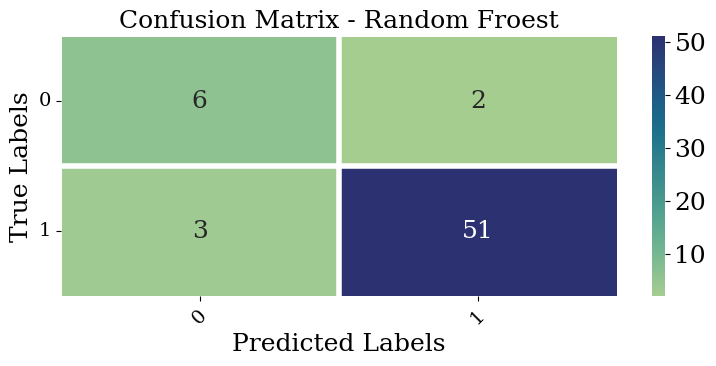

In [17]:
#Confusion Matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Random Froest"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

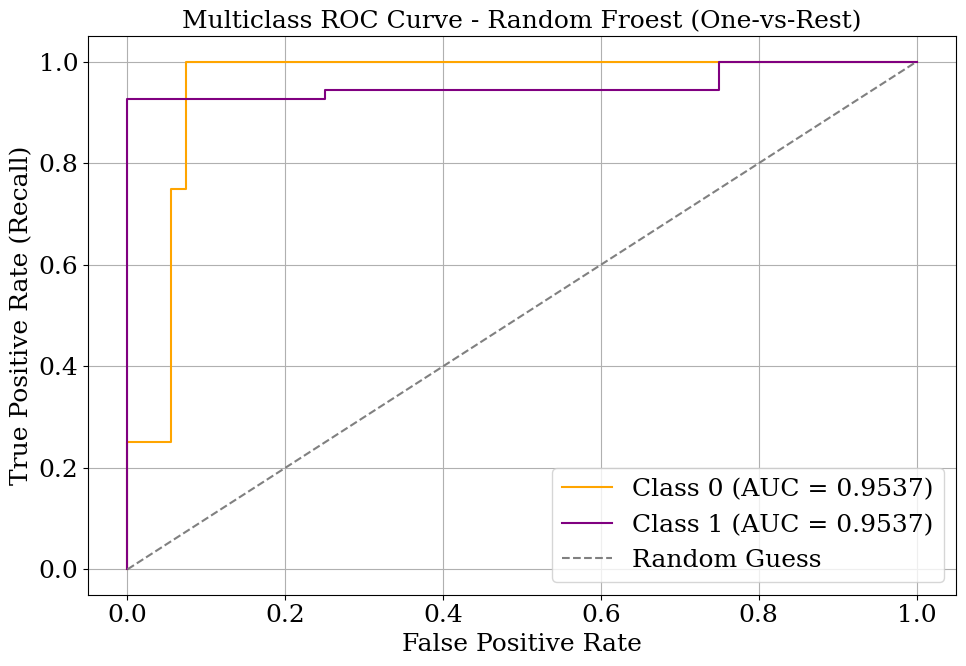

In [18]:
#Roc Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['orange','purple']  # One color per class

for idx, positive_class in enumerate(rf_clf.classes_):
    # Get the column index of the current class
    class_index = list(rf_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = rf_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Random Froest (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# K-Nearest Neighbor (KNN)

In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [20]:
#Evaluation with Full Metrics KNN
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.8871
Precision: 0.9273
Recall: 0.9444
F1 Score: 0.9358
ROC AUC Score: 0.9144
Balanced Accuracy: 0.7222
Matthews Corr Coef: 0.4708


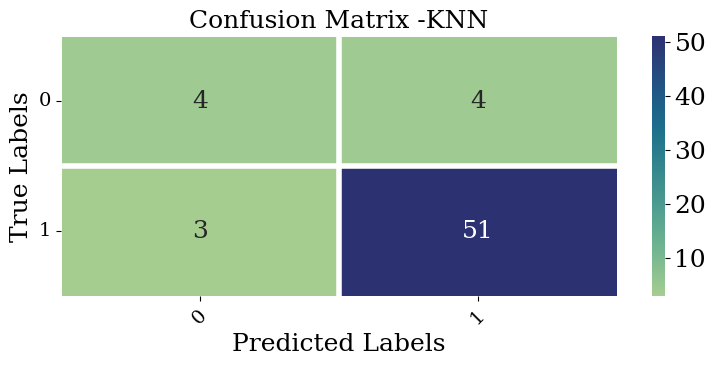

In [21]:
#Confusion Matrix KNN
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -KNN"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

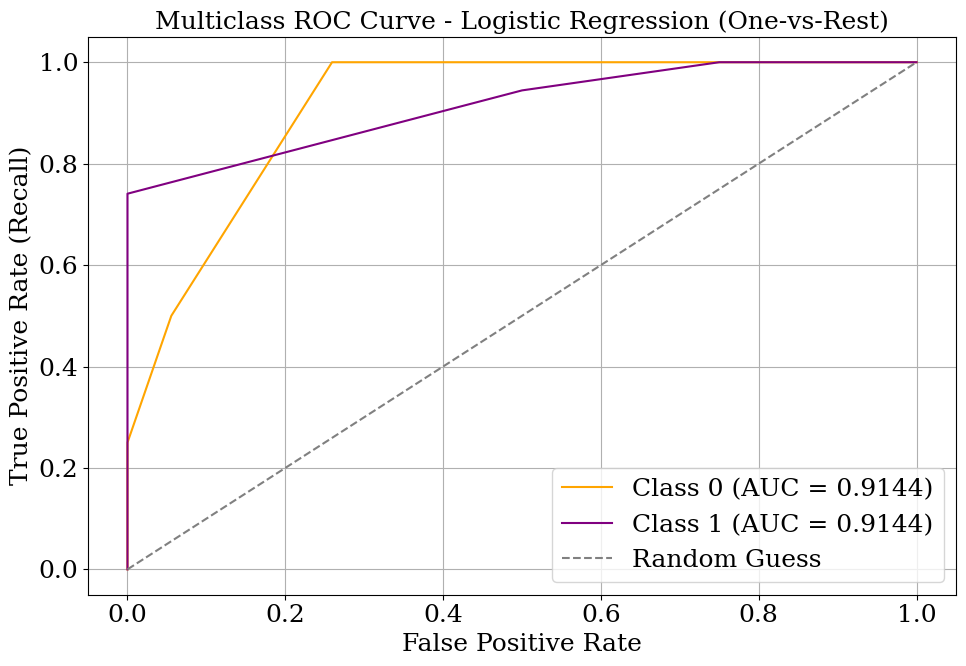

In [22]:
#Roc Curve Logistic Regression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['orange','purple']  # One color per class

for idx, positive_class in enumerate(knn.classes_):
    # Get the column index of the current class
    class_index = list(knn.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = knn.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Logistic Regression (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()